In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Dhanonjoy-2021331099/Data-Set/refs/heads/main/Time.csv')
df.head()
df.shape



(28, 12)

In [25]:
X_train,x_test, y_train,y_test = train_test_split(df[['Total Screen Time ']],df[['Yoga']],test_size=0.45,random_state=42)


In [26]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[2, 4],
       [0, 7]])

Text(0.5, 1.0, 'Confuision Matrix Heatmap')

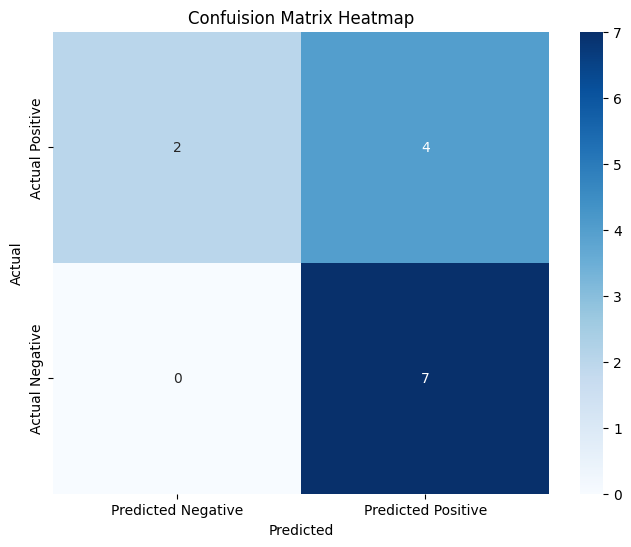

In [29]:
pt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels=['Predicted Negative','Predicted Positive'],
            yticklabels=['Actual Positive','Actual Negative'])
pt.xlabel('Predicted')
pt.ylabel('Actual')
pt.title("Confuision Matrix Heatmap")

In [33]:
# Split the confuisionn matrix into TP, FP, FN, TN
tn,fp,fn,tp = cm.ravel()
print(f"True Negative (TP):{tn} ")
print(f"False Positive (TP):{fp} ")
print(f"False Negative (TP):{fn} ")
print(f"True Positive (TP):{tp} ")

True Negative (TP):2 
False Positive (TP):4 
False Negative (TP):0 
True Positive (TP):7 


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.64      1.00      0.78         7

    accuracy                           0.69        13
   macro avg       0.82      0.67      0.64        13
weighted avg       0.80      0.69      0.65        13



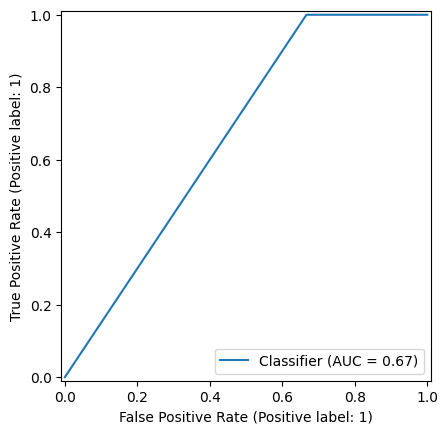

In [35]:
# Display ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred)